In [ ]:
import pandas as pd
import numpy as np
from selenium import webdriver as wd
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time
import re
import math
from bs4 import BeautifulSoup
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import StaleElementReferenceException


df = pd.read_csv('nowon.csv')

In [ ]:
df=df[["상호명", "상권업종중분류명", "상권업종소분류명", "시군구명", "법정동명", "도로명주소", "kakao_keyword", "kakao_url"]]


In [ ]:
# kakao_url 이 없는 것 제외
nowon = df.dropna(axis=0)

In [ ]:
rating_list = []
userid_list = []
itemid_list = []
timestamp_list = []
comment_list = []

driver = wd.Chrome(r'C:/Users/user/Desktop/dd/Data_Handling/chromedriver.exe')

for k, row in nowon.iterrows():
    url = nowon["kakao_url"][k]
    print(k,"번째 크롤링 중 : ",nowon["상호명"][k] , sep=" ")
    driver.get(url)

    time.sleep(2)
    
    try:
        rating_num = driver.find_element_by_css_selector('#mArticle > div.cont_evaluation > div.evaluation_sorting > a > span.color_b').text
        rating_num = int(rating_num)
        print(rating_num)
        
        # 별점 개수로 페이지를 넘기는 기준을 정하기로 함 / 한 페이지 당 최대 리뷰는 5개!
        if rating_num > 0 and rating_num <= 5:
            p_num = 1
            print(p_num)
            
            time.sleep(2)
           
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            user = driver.find_elements_by_xpath("//a[@class='link_user']")
            review_lists = soup.select('.list_evaluation > li')
            time.sleep(3)
            for j in range(0, len(user)):
                userid_list.append(user[j].get_attribute("data-userid")) # 새로 생성한 userid_list에 userid를 추출해 더합니다.
                itemid_list.append(nowon["상호명"][k])
                timestamp_list.append(soup.select('.time_write')[j].text)
                time.sleep(3)
            if len(review_lists) != 0:
                for j, review in enumerate(review_lists):
                    comment = review.select('.txt_comment > span') 
                    rating = review.select('.grade_star > em') # 별점
                            
                    if len(comment) != 0:
                        if len(rating) != 0 :
                            comment_list.append(comment[0].text) 
                            rating_list.append(rating[0].text)
                            time.sleep(3)
                        else:
                            comment_list.append(comment[0].text) 
                            rating_list.append('0')
            else:
                print('리뷰가 없습니다.')
                time.sleep(3)    
                    
                    
        # 2 페이지
        elif rating_num >= 6 and rating_num <= 10:
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            user = driver.find_elements_by_xpath("//a[@class='link_user']")
            review_lists = soup.select('.list_evaluation > li')
            time.sleep(3)
            for j in range(0, len(user)):
                userid_list.append(user[j].get_attribute("data-userid")) # 새로 생성한 userid_list에 userid를 추출해 더합니다.
                itemid_list.append(nowon["상호명"][k])
                timestamp_list.append(soup.select('.time_write')[j].text)
                time.sleep(3)
            if len(review_lists) != 0:
                for j, review in enumerate(review_lists):
                    comment = review.select('.txt_comment > span') 
                    rating = review.select('.grade_star > em') # 별점
                            
                    if len(comment) != 0:
                        if len(rating) != 0:
                            comment_list.append(comment[0].text) 
                            rating_list.append(rating[0].text)
                            time.sleep(3)
                        else:
                            comment_list.append(comment[0].text) 
                            rating_list.append('0')
            else:
                print('리뷰가 없습니다.')
                time.sleep(3)
                    
            driver.find_element_by_xpath('//*[@id="mArticle"]/div[4]/div[4]/div/a').click()
            time.sleep(2)
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            user = driver.find_elements_by_xpath("//a[@class='link_user']")
            review_lists = soup.select('.list_evaluation > li')
            time.sleep(3)
            
            for j in range(0, len(user)):
                userid_list.append(user[j].get_attribute("data-userid")) # 새로 생성한 userid_list에 userid를 추출해 더합니다.
                itemid_list.append(nowon["상호명"][k])
                timestamp_list.append(soup.select('.time_write')[j].text)
                time.sleep(3)
            if len(review_lists) != 0:
                for j, review in enumerate(review_lists):
                    comment = review.select('.txt_comment > span') 
                    rating = review.select('.grade_star > em') # 별점
                            
                    if len(comment) != 0:
                        if len(rating) != 0:
                            comment_list.append(comment[0].text) 
                            rating_list.append(rating[0].text)
                            time.sleep(3)
                        else:
                            comment_list.append(comment[0].text) 
                            rating_list.append('0')
            else:
                print('리뷰가 없습니다.')
                time.sleep(3)
                    
        # 3페이지 이하         
        elif rating_num >= 11 and rating_num <= 15:
            p_num = 3
            print(p_num)
                 
            for i in range(1,p_num+1):
                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                user = driver.find_elements_by_xpath("//a[@class='link_user']")
                review_lists = soup.select('.list_evaluation > li')
                time.sleep(3)
                for j in range(0, len(user)):
                    userid_list.append(user[j].get_attribute("data-userid")) # 새로 생성한 userid_list에 userid를 추출해 더합니다.
                    itemid_list.append(nowon["상호명"][k])
                    timestamp_list.append(soup.select('.time_write')[j].text)
               
            # 카카오맵의 개인 user별 url의 규칙은 다음과 같습니다.
                    time.sleep(3)
                if len(review_lists) != 0:
                    for j, review in enumerate(review_lists):
                        comment = review.select('.txt_comment > span') 
                        rating = review.selec('.grade_star > em')
                            
                        if len(comment) != 0:
                            if len(rating) != 0:
                                comment_list.append(comment[0].text) 
                                rating_list.append(rating[0].text)
                                time.sleep(3)
                            else:
                                comment_list.append(comment[0].text) 
                                rating_list.append('0')
                else:
                    print('리뷰가 없습니다.')
                try: # 마지막 페이지 크롤링을 위해서 try사용
                    driver.find_element_by_xpath('//*[@id="mArticle"]/div[4]/div[4]/div/a['+ str(i) +']').click() # 페이지별로 실행하고
                except:
                    continue
                time.sleep(2)
               
                
        # 4페이지     
        elif rating_num >= 16 and rating_num <= 20:
            p_num = 4
            print(p_num)
            
            for i in range(1,p_num+1):
                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                user = driver.find_elements_by_xpath("//a[@class='link_user']")
                review_lists = soup.select('.list_evaluation > li')
                time.sleep(2)
                for j in range(0, len(user)):
                    userid_list.append(user[j].get_attribute("data-userid")) # 새로 생성한 userid_list에 userid를 추출해 더합니다.
                    itemid_list.append(nowon["상호명"][k])
                    timestamp_list.append(soup.select('.time_write')[j].text)
            # 카카오맵의 개인 user별 url의 규칙은 다음과 같습니다.
                time.sleep(2)
               
                if len(review_lists) != 0:
                    for j, review in enumerate(review_lists):
                        comment = review.select('.txt_comment > span') 
                        rating = review.select('.grade_star > em')
                            
                        if len(comment) != 0:
                            if len(rating) != 0:
                                comment_list.append(comment[0].text) 
                                rating_list.append(rating[0].text)
                                time.sleep(3)
                            else:
                                comment_list.append(comment[0].text) 
                                rating_list.append('0')
                else:
                    print('리뷰가 없습니다.')
                try: # 마지막 페이지 크롤링을 위해서 try사용
                    driver.find_element_by_xpath('//*[@id="mArticle"]/div[4]/div[4]/div/a['+ str(i) +']').click() # 페이지별로 실행하고
                except:
                    continue
                time.sleep(2)
            
                        
            
                        
        # 5페이지 이상           
        elif rating_num >= 21:
            p_num = int(math.ceil(rating_num / 5))
            print(p_num)
            
            for i in range(1, 7):
                p_num -= 1
                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                user = driver.find_elements_by_xpath("//a[@class='link_user']")
                review_lists = soup.select('.list_evaluation > li')
                time.sleep(2)
                for j in range(0, len(user)):
                    userid_list.append(user[j].get_attribute("data-userid")) # 새로 생성한 userid_list에 userid를 추출해 더합니다.
                    itemid_list.append(nowon["상호명"][k])
                    timestamp_list.append(soup.select('.time_write')[j].text)
             # 카카오맵의 개인 user별 url의 규칙은 다음과 같습니다.
                    time.sleep(3)
              
                
                    # 리뷰 리스트가 0이 아니면
                if len(review_lists) != 0:
                    for j, review in enumerate(review_lists):
                        comment = review.select('.txt_comment > span') 
                        rating = review.select('.grade_star > em') # 별점
                            
                        if len(comment) != 0:
                            if len(rating) != 0:
                                comment_list.append(comment[0].text) 
                                rating_list.append(rating[0].text)
                                time.sleep(3)
                            else:
                                comment_list.append(comment[0].text) 
                                rating_list.append('0')
                else:
                    print('리뷰가 없습니다.')
                try: # 마지막 페이지 크롤링을 위해서 try사용
                    driver.find_element_by_xpath('//*[@id="mArticle"]/div[4]/div[4]/div/a['+ str(i) +']').click() # 페이지별로 실행하고
                except:
                    continue
                time.sleep(2)
                print(p_num)
                pp_num = p_num
            while p_num <= pp_num and p_num >= 0:
                for a in range(2,7) :
                    p_num -= 1
                    html = driver.page_source
                    soup = BeautifulSoup(html, 'html.parser')
                    review_lists = soup.select('.list_evaluation > li')
                    user = driver.find_elements_by_xpath("//a[@class='link_user']")
                    time.sleep(2)
                    for j in range(0,len(user)):
                        userid_list.append(user[j].get_attribute("data-userid")) # 새로 생성한 userid_list에 userid를 추출해 더합니다.
                        itemid_list.append(nowon["상호명"][k])
                        timestamp_list.append(soup.select('.time_write')[j].text)
                        time.sleep(2)
                    if len(review_lists) != 0:
                        for i, review in enumerate(review_lists):
                            comment = review.select('.txt_comment > span') # 리뷰
                            rating = review.select('.grade_star > em') # 별점
                            if len(comment) != 0:
                                if len(rating) != 0:
                                    comment_list.append(comment[0].text) 
                                    rating_list.append(rating[0].text)
                                    time.sleep(3)
                                else:
                                    comment_list.append(comment[0].text) 
                                    rating_list.append('0')
                    else:
                        print('no review in extract')
                    try:
                        driver.find_element_by_xpath('//*[@id="mArticle"]/div[4]/div[4]/div/a['+ str(a) +']').click() # 페이지별로 실행하고
                    except:
                        continue
                    time.sleep(3)    
              
            
                            
                                       

    except (NoSuchElementException, ElementNotInteractableException):
        print("리뷰가 없습니다")
        continue 
        





# 카카오 크롤링 코드 된 것 같습니다. 10페이지이상도 잘돌아갑니다.
# 그런데 문제점이 하나 생겼습니다..... 

In [1]:
import PIL.Image as pilimg


원조이모네연탄불곱창 = pilimg.open('1.PNG')
카페노티드청담 = pilimg.open('2.PNG')

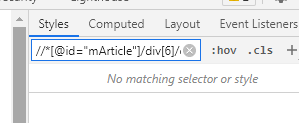

In [2]:
원조이모네연탄불곱창

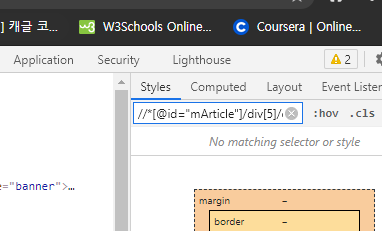

In [3]:
카페노티드청담

# 위에 2개 음식점 비교한거 보시면 나머지 뒷부분은 다같은데 [@id="mArticle"]/div[여기 숫자]
# 저기 div안에 숫자가 위는6이고 아래는5입니다. 근데 이뿐만 아니라 다른 음식점도 랜덤으로 그 숫자가 3이나 4처럼 되어있습니다. 크롤링 하면서 어쩌다 다음 음식점이 그 전 음식점이랑 div 안에 숫자가 같으면 상관 없는데
# 다른 경우가 문제입니다...